# Data Analysis and visualization for tracking developer productivity

Chipy's mentorship program is an extra-ordinary jounery for becoming a better developer. As a mentee, you are expected to do a lot - you read new articles/books, write code, debug and troubleshoot, pair program with other mentees in coding workshop or your mentor. This is involves managing time efficiently and doing the effective things. But as the old adage goes, "you can't manage what you can't measure".

This project is the third of the three part series of building tools for the mentees for tracking time. The end goal of such a tool will be to aggregate anonymous data and analyze how does a typical mentee spend on blogging (b), coding (c), debugging (d), pair program (p) with mentor or other mentees.

In this project we will be using `pandas` to analyze the data gathered by using the command line tool we built in the first part of the series. We will also be using `altair`, a visualization library to do some exploratory analysis of the data.

Short url for this page: http://bit.ly/data_trackcoder

##  Is this project for you

Before you progress further, let's check if we are ready to solve this. You should

- Have a personal computer with working wifi and power cord
- Have Python 3 installed on your computer. *Yes, **Python 3** only* 😎
- Have some idea about lists, dictionaries and functions
- Have created a virtual environment and installing packages with `pip`

In addition, you should be familiar with [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder), and [Part 2](https://bit.ly/flask_trackcoder) of this three part exercise.

## Getting the project setup in your computer
If you are familiar with git, run


```
git clone https://github.com/chicagopython/CodingWorkshops.git
```

If not, go to https://github.com/chicagopython/CodingWorkshops

Click on the Download Zip and unzip the file that gets downloaded.

From your command line (terminal in mac osx, or linux and command prompt in windows), change directory to the path where you have downloaded it.


    On linux or OS X

      > cd path/to/CodingWorkshops/problems/data_science/

    On Windows

      > cd path\to\CodingWorkshops\problems\data_science

### Check if you have the latest notebook

If you have downloaded the notebook before the event of the Project Night, you have downloaded the notebook with only materials to review for project night without the actual problems. The actual problems will be released 2 hours before the event. Please update your notebook in order to get the challenge questions.

In that directory, run the following command

    git pull


### Installation of Required packages

The following packages are needed for this project.

```
numpy==1.14.2
pandas==0.22.0
python-dateutil==2.7.2
pytz==2018.4
scikit-learn==0.19.1
scipy==1.0.1
six==1.11.0
sklearn==0.20.0
altair==2.2.2 
```
These packages are listed in the file `requirements.txt` in this directory.
From a terminal (in mac ox or linux) or command prompt (windows), install them using the following command.

```
pip install -r requirements.txt
```

Once the installation completed, start Jupyter notebook by issuing the command.
    
    > jupyter notebook

Running the following command here will open up a browser (http://localhost:8888)  and display all the notebooks under this directory.
Double click to open the `trackcoder` notebook.

Next execute the cell below by hitting `Shift + Enter`.

In [1]:
import pandas

If the above line executes without any error, then congratulations 🎉 - you have successfully installed everything, and ready to get started.

## Getting Started with Pandas

### Loading pandas

We will start off with an gentle introduction to `pandas` that is mostly taken from the [wonderful 10 minutes guide](https://pandas.pydata.org/pandas-docs/stable/10min.html). Lets start by importing the necessary packages.

In [2]:
import pandas as pd
import numpy as np

### Pandas Series and Dataframe

#### Series

A pandas `Series` is a one-dimensional labeled array capable of holding any data type. The axis labels are collectively referred to as the index. Lets create `series` from the different task types that we have defined in [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder#181-interactive-mode).

In [3]:
description = pd.Series(data=['blogging','coding','debugging','mentor','pair_programming', 'research'], 
                        index=['b', 'c', 'd','m','p','r'])
print(f"data: {description.values}\nindex: {description.index}")

data: ['blogging' 'coding' 'debugging' 'mentor' 'pair_programming' 'research']
index: Index(['b', 'c', 'd', 'm', 'p', 'r'], dtype='object')


#### DataFrame

A pandas `DataFrame` is a 2-dimensional labeled data structure where the columns can be of different data types. 

Lets create another series with number of minutes and same indexes as that of `description`.

In [4]:
mins = pd.Series([100,100,200,50,50,300], ['b', 'c', 'd', 'm', 'p', 'r'])

Now lets create a dataframe using `description` and `mins`.

In [5]:
d = {'description': description, 'mins': mins}

frame = pd.DataFrame(d)
frame

description  mins
b          blogging   100
c            coding   100
d         debugging   200
m            mentor    50
p  pair_programming    50
r          research   300

### Loading the data

Next we will load the data present in the sqlite database in the folder `CodingWorkshops/problems/py101/trackcoder/`. If you choose to use a different dataset, all you need to do is change the value of `db` to the path of your file.

In [6]:
db="../py101/trackcoder/to_do_list.db"

In [7]:
import sqlite3
conn = sqlite3.connect(db)
df = pd.read_sql_query("select * from todo", conn)

### Viewing the data

In [8]:
df.head() #first 5 rows

id task                            description                   timestamp  \
0   1    b           #asyncio blog post completed  2018-10-12 23:00:56.864056   
1   2    b       #asyncio is really completicated  2018-10-12 23:01:21.875416   
2   3    b  #data_science is really completicated  2018-10-12 23:03:26.697286   
3   4    c               #asyncio completed stuff  2018-10-12 23:07:19.131405   
4   5    m            #asyncio ask some questions  2018-10-12 23:08:09.363419   

   mins  done  
0    30     1  
1    30     1  
2    30     1  
3    30     1  
4    30     1

In [9]:
df.tail() # last 5 rows

id task                                        description  \
22  23    c              #pandas apply function to a dataframe   
23  24    m                            checking in with mentor   
24  25    d                            stupid typo-ed a comma!   
25  26    d  #visualization trying to figure string type fo...   
26  27    c                    #visualization barchart created   

                     timestamp  mins  done  
22  2018-11-04 05:39:13.803043    20     1  
23  2018-11-04 05:43:03.523862    20     1  
24  2018-11-04 06:07:05.694163    20     1  
25  2018-11-04 07:00:06.893573    20     1  
26  2018-11-04 07:55:20.632394    20     1

### Fix data type

Pandas has the following data types.

```
object
int64
float64
bool
datetime64
timedelta[ns]
category
```

Notice that when we imported the data from our sqlite database, all the columns got imported as objects. Lets fix this by editing the data type of the column inplace, i.e. modify the data frame so that beyond this point this change will persist for the dataframe.

In [10]:
df.dtypes

id              int64
task           object
description    object
timestamp      object
mins            int64
done            int64
dtype: object

In [11]:
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df['done'] = df['done'].astype('bool')
df.head()

id task                            description                  timestamp  \
0   1    b           #asyncio blog post completed 2018-10-12 23:00:56.864056   
1   2    b       #asyncio is really completicated 2018-10-12 23:01:21.875416   
2   3    b  #data_science is really completicated 2018-10-12 23:03:26.697286   
3   4    c               #asyncio completed stuff 2018-10-12 23:07:19.131405   
4   5    m            #asyncio ask some questions 2018-10-12 23:08:09.363419   

   mins  done  
0    30  True  
1    30  True  
2    30  True  
3    30  True  
4    30  True

### Index, columns and summary

In [12]:
df.index

RangeIndex(start=0, stop=27, step=1)

Columns

In [13]:
df.columns

Index(['id', 'task', 'description', 'timestamp', 'mins', 'done'], dtype='object')

Quickly summarize the descriptive statistics

In [14]:
df.describe()

id       mins
count  27.000000  27.000000
mean   14.000000  22.592593
std     7.937254   8.477387
min     1.000000   5.000000
25%     7.500000  20.000000
50%    14.000000  20.000000
75%    20.500000  30.000000
max    27.000000  30.000000

### Selecting data

Lets say we need to find the first three tasks, and get the values for timestamp and description of the task. Pandas provides a few ways to access the data from the dataframe - by label based indexes, numerical indexes or a hybrid approach.

Try them out by yourself, by running the code below.

```python
df[0:2] # gives you first three rows, all columns
df[0:2][['timestamp', 'description']] # returns a copy with only 'timestamp' and 'description'

df.iloc[0:2] # purely integer based indexing, similar to indexing in python. first three rows, all columns
df.iloc[0:2][['timestamp', 'description']]
df.iloc[[0,1,2],[2,3]]
```

In [15]:
df.iloc[[0,1,2],[2,3]]

description                  timestamp
0           #asyncio blog post completed 2018-10-12 23:00:56.864056
1       #asyncio is really completicated 2018-10-12 23:01:21.875416
2  #data_science is really completicated 2018-10-12 23:03:26.697286

To better understand how indexes work and show how the last two are different, lets make a copy of our dataframe.

In [16]:
_df = df.copy()

Lets set the index to be task instead of index pandas automatically provided us with.

In [17]:
_df.set_index('task', inplace=True)

Take a look at how the `_df` is different from `df`.

In [18]:
_df

id                                        description  \
task                                                          
b      1                       #asyncio blog post completed   
b      2                   #asyncio is really completicated   
b      3              #data_science is really completicated   
c      4                           #asyncio completed stuff   
m      5                        #asyncio ask some questions   
m      6                          #asyncio got the answerss   
d      7                          #asyncio got the answerss   
r      8                         #asyncio looking into docs   
p      9                       #asyncio coding in the stuff   
d     10                #jinja trying to figure app_context   
d     11      #bootstrap cards how to make cards cliackable   
d     12   #bootstrap figuring out how to integrate wtforms   
d     13    #bootstrap trying to get form alignment working   
d     14      #cft trying to figure how to add read replica   
r     15  #cft read through cloud formation docs to unde...   
r     16           #pandas tutorial for timeseries analysis   
r     17  #pandas fixing matplotlib errors needed restar...   
d     18         #pandas converting timestamp to datetime64   
r     19  timeseries data visualization with vega, vega-...   
r     20                                     #visualization   
c     21              #pandas which tasks take up most time   
c     22  #pandas #regular_expression which tasks take u...   
c     23              #pandas apply function to a dataframe   
m     24                            checking in with mentor   
d     25                            stupid typo-ed a comma!   
d     26  #visualization trying to figure string type fo...   
c     27                    #visualization barchart created   

                      timestamp  mins  done  
task                                         
b    2018-10-12 23:00:56.864056    30  True  
b    2018-10-12 23:01:21.875416    30  True  
b    2018-10-12 23:03:26.697286    30  True  
c    2018-10-12 23:07:19.131405    30  True  
m    2018-10-12 23:08:09.363419    30  True  
m    2018-10-12 23:08:20.690693    30  True  
d    2018-10-12 23:08:37.566848    30  True  
r    2018-10-12 23:08:56.649820    30  True  
p    2018-10-12 23:10:12.633999    30  True  
d    2018-10-14 09:07:52.702126    30  True  
d    2018-10-14 09:08:38.856013    30  True  
d    2018-10-15 19:05:23.955170    30  True  
d    2018-10-15 19:07:06.278395     5  True  
d    2018-10-21 08:02:29.179643    20  True  
r    2018-10-21 09:08:42.564314    30  True  
r    2018-11-03 09:59:59.886021    20  True  
r    2018-11-03 10:07:50.354188     5  True  
d    2018-11-03 10:54:21.074068    10  True  
r    2018-11-03 11:12:53.290185    10  True  
r    2018-11-03 11:59:11.041432    10  True  
c    2018-11-03 18:05:39.199989    20  True  
c    2018-11-03 18:08:00.601788    20  True  
c    2018-11-04 05:39:13.803043    20  True  
m    2018-11-04 05:43:03.523862    20  True  
d    2018-11-04 06:07:05.694163    20  True  
d    2018-11-04 07:00:06.893573    20  True  
c    2018-11-04 07:55:20.632394    20  True

Now execute the following cells to find how different indexes can be used for selecting data.

```python
_df.loc['b'] # all rows matching task type b
_df.loc[_df['mins']==30, ['description','timestamp']] # returns only a dataframe where the mins equals 30
_df.loc[_df['mins']==30, 'description'] # returns a series where the mins equals 30
```

In [19]:
_df.loc['b']

id                            description                  timestamp  \
task                                                                         
b      1           #asyncio blog post completed 2018-10-12 23:00:56.864056   
b      2       #asyncio is really completicated 2018-10-12 23:01:21.875416   
b      3  #data_science is really completicated 2018-10-12 23:03:26.697286   

      mins  done  
task              
b       30  True  
b       30  True  
b       30  True

In [20]:
_df.loc[_df['mins']==30, ['description','timestamp']]

description  \
task                                                      
b                          #asyncio blog post completed   
b                      #asyncio is really completicated   
b                 #data_science is really completicated   
c                              #asyncio completed stuff   
m                           #asyncio ask some questions   
m                             #asyncio got the answerss   
d                             #asyncio got the answerss   
r                            #asyncio looking into docs   
p                          #asyncio coding in the stuff   
d                   #jinja trying to figure app_context   
d         #bootstrap cards how to make cards cliackable   
d      #bootstrap figuring out how to integrate wtforms   
r     #cft read through cloud formation docs to unde...   

                      timestamp  
task                             
b    2018-10-12 23:00:56.864056  
b    2018-10-12 23:01:21.875416  
b    2018-10-12 23:03:26.697286  
c    2018-10-12 23:07:19.131405  
m    2018-10-12 23:08:09.363419  
m    2018-10-12 23:08:20.690693  
d    2018-10-12 23:08:37.566848  
r    2018-10-12 23:08:56.649820  
p    2018-10-12 23:10:12.633999  
d    2018-10-14 09:07:52.702126  
d    2018-10-14 09:08:38.856013  
d    2018-10-15 19:05:23.955170  
r    2018-10-21 09:08:42.564314

In [21]:
_df.loc[_df['mins']==30, 'description']

task
b                         #asyncio blog post completed
b                     #asyncio is really completicated
b                #data_science is really completicated
c                             #asyncio completed stuff
m                          #asyncio ask some questions
m                            #asyncio got the answerss
d                            #asyncio got the answerss
r                           #asyncio looking into docs
p                         #asyncio coding in the stuff
d                  #jinja trying to figure app_context
d        #bootstrap cards how to make cards cliackable
d     #bootstrap figuring out how to integrate wtforms
r    #cft read through cloud formation docs to unde...
Name: description, dtype: object

Finally, check how having different indexes change the way you access the data.

In [23]:
df.loc[0:2] # Purely label-location based indexer for selection by label. This works as index is an integer.
# _df.loc[0:2] # Does not work

id task                            description                  timestamp  \
0   1    b           #asyncio blog post completed 2018-10-12 23:00:56.864056   
1   2    b       #asyncio is really completicated 2018-10-12 23:01:21.875416   
2   3    b  #data_science is really completicated 2018-10-12 23:03:26.697286   

   mins  done  
0    30  True  
1    30  True  
2    30  True

In [ ]:
_df.loc[0:2] # Does not work

To understand more about how indexes work read through [Zax's tutorial on Pandas MultiIndex](http://www.zaxrosenberg.com/pandas-multiindex-tutorial/)

### Aggregation
Now that we have some idea about the basics, lets get into the actual analysis. Lets start by getting the total count of each type of task that we have in our dataset.

In [25]:
df.groupby(['task']).count()

id  description  timestamp  mins  done
task                                        
b      3            3          3     3     3
c      5            5          5     5     5
d      9            9          9     9     9
m      3            3          3     3     3
p      1            1          1     1     1
r      6            6          6     6     6

### What are the frequencies of each task type?
Note the above result is a Series. One approach can be to reset the index of the series using the count of the task types and sort in the reverse order to get the list.

In [27]:
df.head(5)

id task                            description                  timestamp  \
0   1    b           #asyncio blog post completed 2018-10-12 23:00:56.864056   
1   2    b       #asyncio is really completicated 2018-10-12 23:01:21.875416   
2   3    b  #data_science is really completicated 2018-10-12 23:03:26.697286   
3   4    c               #asyncio completed stuff 2018-10-12 23:07:19.131405   
4   5    m            #asyncio ask some questions 2018-10-12 23:08:09.363419   

   mins  done  
0    30  True  
1    30  True  
2    30  True  
3    30  True  
4    30  True

In [47]:
df2 = df.copy()

In [48]:
df2 = df2.groupby(['task']).count()

In [50]:
df2.reset_index()

task  id  description  timestamp  mins  done
0    b   3            3          3     3     3
1    c   5            5          5     5     5
2    d   9            9          9     9     9
3    m   3            3          3     3     3
4    p   1            1          1     1     1
5    r   6            6          6     6     6

In [51]:
df2 = df2.iloc[:,0:1]

In [52]:
df2

id
task    
b      3
c      5
d      9
m      3
p      1
r      6

### What are the frequency of each task type per day?
Aggregation can be performed on multiple columns as well. Hint: `pd.DatetimeIndex(df['timestamp']).date` will extract date from a timestamp.

In [46]:
pd.DatetimeIndex(df['timestamp']).date

array([datetime.date(2018, 10, 12), datetime.date(2018, 10, 12),
       datetime.date(2018, 10, 12), datetime.date(2018, 10, 12),
       datetime.date(2018, 10, 12), datetime.date(2018, 10, 12),
       datetime.date(2018, 10, 12), datetime.date(2018, 10, 12),
       datetime.date(2018, 10, 12), datetime.date(2018, 10, 14),
       datetime.date(2018, 10, 14), datetime.date(2018, 10, 15),
       datetime.date(2018, 10, 15), datetime.date(2018, 10, 21),
       datetime.date(2018, 10, 21), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 3), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 3), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 3), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 4), datetime.date(2018, 11, 4),
       datetime.date(2018, 11, 4), datetime.date(2018, 11, 4),
       datetime.date(2018, 11, 4)], dtype=object)

In [58]:
df.columns

Index(['id', 'task', 'description', 'timestamp', 'mins', 'done'], dtype='object')

In [59]:
df.insert(0,'date',pd.DatetimeIndex(df['timestamp']).date)

In [61]:
df.head(3)

date  id task                            description  \
0  2018-10-12   1    b           #asyncio blog post completed   
1  2018-10-12   2    b       #asyncio is really completicated   
2  2018-10-12   3    b  #data_science is really completicated   

                   timestamp  mins  done  
0 2018-10-12 23:00:56.864056    30  True  
1 2018-10-12 23:01:21.875416    30  True  
2 2018-10-12 23:03:26.697286    30  True

In [62]:
df.groupby(['task','date']).count()

id  description  timestamp  mins  done
task date                                              
b    2018-10-12   3            3          3     3     3
c    2018-10-12   1            1          1     1     1
     2018-11-03   2            2          2     2     2
     2018-11-04   2            2          2     2     2
d    2018-10-12   1            1          1     1     1
     2018-10-14   2            2          2     2     2
     2018-10-15   2            2          2     2     2
     2018-10-21   1            1          1     1     1
     2018-11-03   1            1          1     1     1
     2018-11-04   2            2          2     2     2
m    2018-10-12   2            2          2     2     2
     2018-11-04   1            1          1     1     1
p    2018-10-12   1            1          1     1     1
r    2018-10-12   1            1          1     1     1
     2018-10-21   1            1          1     1     1
     2018-11-03   4            4          4     4     4

### What are the amount of time spent per task type?
You can use the `sum` function to add up the minutes and sort them in reverse order.

In [69]:
df[['task','mins']].groupby(['task']).sum()

mins
task      
b       90
c      110
d      195
m       80
p       30
r      105

In [66]:
df.groupby(['task']).sum()

id  mins  done
task                 
b       6    90   3.0
c      97   110   5.0
d     136   195   9.0
m      35    80   3.0
p       9    30   1.0
r      95   105   6.0

In [80]:
df.query('task=="b"')

date  id task                            description  \
0  2018-10-12   1    b           #asyncio blog post completed   
1  2018-10-12   2    b       #asyncio is really completicated   
2  2018-10-12   3    b  #data_science is really completicated   

                   timestamp  mins  done  
0 2018-10-12 23:00:56.864056    30  True  
1 2018-10-12 23:01:21.875416    30  True  
2 2018-10-12 23:03:26.697286    30  True

In [132]:
df.groupby('task')['mins'].sum().sort_values(ascending=False)

task
d    195
c    110
r    105
b     90
m     80
p     30
Name: mins, dtype: int64

## Hashtag analysis

Hashtags are simple and easy way to put contextual information and in our data we find them in task descriptions. A task description might have no hashtag at all, a single hashtag or multiple hashtags. To start we need to parse the hashtags out from the description using regular expression. The following shows how multiple hastags are parsed out from a singe description.

```python
description = pd.Series(['#altair #pandas at project night'])
description.str.findall(r'#.*?(?=\s|$)').tolist()
```


In [81]:
description = pd.Series(['#altair #pandas at project night'])

In [82]:
description.str.findall(r'#.*?(?=\s|$)').tolist()

[['#altair', '#pandas']]

Note the result returned by running the above snippet is a list of lists. You probably want to flatten the list.

### Make a series of unique list of hashtags

In [88]:
example = pd.Series(['#air #michael #jordan #is #better #than #Lebron #is #better #better'])

### What is the frequency of each hashtag?
Hint: In the pandas documentation, take a look at examples under the apply function

In [99]:
example.str.findall(r'#.*?(?=\s|$)').values

array([list(['#air', '#michael', '#jordan', '#is', '#better', '#than', '#Lebron', '#is', '#better', '#better'])],
      dtype=object)

In [103]:
example.str.findall(r'#.*?(?=\s|$)').tolist()[0]

['#air',
 '#michael',
 '#jordan',
 '#is',
 '#better',
 '#than',
 '#Lebron',
 '#is',
 '#better',
 '#better']

In [125]:
temp = pd.DataFrame(example.str.findall(r'#.*?(?=\s|$)').tolist()[0],columns=['words'])
temp

words
0      #air
1  #michael
2   #jordan
3       #is
4   #better
5     #than
6   #Lebron
7       #is
8   #better
9   #better

In [126]:
temp.insert(0,'counter',1)

In [127]:
temp

counter     words
0        1      #air
1        1  #michael
2        1   #jordan
3        1       #is
4        1   #better
5        1     #than
6        1   #Lebron
7        1       #is
8        1   #better
9        1   #better

In [128]:
temp.groupby(['words']).count()

counter
words            
#Lebron         1
#air            1
#better         3
#is             2
#jordan         1
#michael        1
#than           1

### Which hash tag consumes the most amount of time?
This solution to this one is similar to the one above. Keep in mind that you need to handle the conditions where there are no hashtags in a description.

## Plotting wih Altair

Visualization is a powerful technique to find patterns in a dataset. It is also useful for communicate the findings of an analysis of a dataset. In the next section we will answer some simple questions about our dataset using visualization. While `matplotlib` is one of the most successful packages for the purpose, we will be using [`Altair`](https://altair-viz.github.io/) that provides a simple yet powerful declarative way of building charts.

Think of it as SQL, but for charts.

In [133]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

We need to enable the renderer based on which environment we are using - `notebook` for jupyter notebooks, `jupterlab` for jupyterlab etc.

### What are the frequencies of each task type?

Lets try to answer the same question we solved above, but this time using `altair`.

Below is a `bar diagram` of our data. Lets break down what is going on in the function. From the official documentation:

> The key to creating meaningful visualizations is to map properties of the data to visual properties in order to effectively communicate information. In Altair, this mapping of visual properties to data columns is referred to as
> an encoding, and is most often expressed through the Chart.encode() method.

Here are the 3 steps for building charts in altair

- pass your data to alt.Chart
```python
alt.Chart(df)
```
- select the type of chart you want to plot
```python    
alt.Chart(df).mark_bar()
```
- `encode` map the property of the data to visual properties
```python
alt.Chart(df).mark_bar().encode(
    y='task'      # map the y axis to df['task']
    x='count()'   # map the x axis to aggregate function of count defined in altair
    color='task') # map the color to df['task']
```

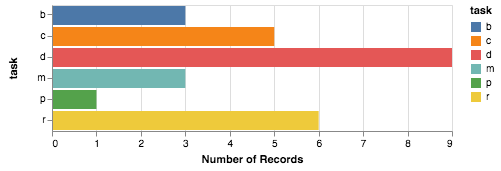

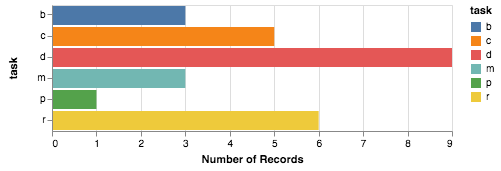

In [15]:
alt.Chart(df).mark_bar().encode(
    y='task',
    x='count()',
    color='task'
)

You can choose different chart types by changing `mark_bar` to `mark_point`, `mark_square`, `mark_geoshape` etc. as applicable for your data. Full list is [here](https://altair-viz.github.io/user_guide/marks.html)

 ### What are the frequencies of each task type per day?

### How much time is spent per task type?

###   Align these charts

Altair makes it easy to build compound charts by combining multiple charts. Arrange the charts above vertically and horizontally by taking a look at the docs.

## Feedback

Thanks for attending this project night. We put in a lot of effort to make this useful for you. However, we can not make it better, unless we hear back from you on what you want and collect data to make changes.

Please take a few moments to fill in the [small form](https://docs.google.com/forms/d/e/1FAIpQLSePDQlWOibJrF7rI5KrYhzUSNfXp9GMP-6b-bjC8_qSFgYp-w/viewform?usp=pp_url&entry.813953991=https://bit.ly/data_trackcoder) and help us improve it.